In [1]:
from google.colab import files
uploaded = files.upload()


Saving mcdonalds.csv to mcdonalds.csv


In [2]:
import pandas as pd

data = pd.read_csv("mcdonalds.csv")
print(data.head())  # Display the first few rows to confirm it's loaded correctly


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [3]:
# Checking for missing values
print(data.isnull().sum())

# Drop or fill NaN values as necessary
data = data.dropna()  # or data.fillna(value, inplace=True)


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [6]:
# Display column names
print(data.columns)


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [9]:
# Identify numeric and categorical columns
print(data.dtypes)

# Select relevant numeric features
# Replace 'VisitFrequency' with appropriate numeric values or convert it if necessary
features = data[['Age']]  # Example using only Age

# If VisitFrequency is categorical, you can encode it
visit_frequency_encoded = pd.get_dummies(data['VisitFrequency'], drop_first=True)
features = pd.concat([features, visit_frequency_encoded], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['VisitFrequency'], hue=data['cluster'], palette='viridis')
plt.xlabel("Age")
plt.ylabel("Visit Frequency")
plt.title("Customer Segmentation Clusters")
plt.show()


yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object


NameError: name 'plt' is not defined

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

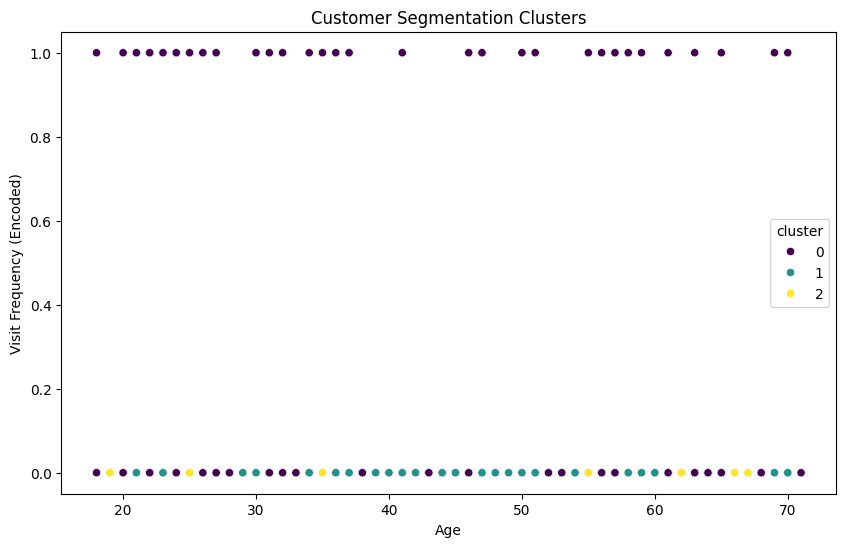

In [12]:
# Select relevant features
# Convert 'VisitFrequency' and 'Gender' using one-hot encoding
visit_frequency_encoded = pd.get_dummies(data['VisitFrequency'], drop_first=True)
gender_encoded = pd.get_dummies(data['Gender'], drop_first=True)

# Combine selected features
features = pd.concat([data[['Age']], visit_frequency_encoded, gender_encoded], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(10, 6))
# Choose the first column of the encoded VisitFrequency for y-axis
sns.scatterplot(x=data['Age'], y=visit_frequency_encoded.iloc[:, 0], hue=data['cluster'], palette='viridis')
plt.xlabel("Age")
plt.ylabel("Visit Frequency (Encoded)")
plt.title("Customer Segmentation Clusters")
plt.show()


In [14]:

# Save the modified dataset
data.to_csv("cleaned_mcdonalds.csv", index=False)
